### 클롤링 함수 만들고, 데이터 수집하기

In [24]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import pandas as pd
import time, datetime
import unicodedata

In [27]:
driver = webdriver.Chrome("Desktop/chromedriver")
url = 'https://www.instagram.com/'
driver.get(url)

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_76923/2042574701.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("Desktop/chromedriver")


In [29]:
# 첫 페이지 선택하기
driver.find_element_by_css_selector("div._aagu").click()

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_76923/282103646.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector("div._aagu").click()


In [11]:
# 크롤링 함수
def searching_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        content = soup.select('div._a9zs > span._aacl')[0].text
        content = unicodedata.normalize('NFC', content)
    
    except:
        content = ''
    
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    time = soup.select('time._aaqe')[0]['datetime'][:10]
    
    try:
        place = soup.select('div._aaqm')[0].text
        
    except:
        place = ' '
    
    data = [content, tags, time, place]
    
    return data

In [12]:
# 다음 페이지 함수
def move_next(driver):
    right = driver.find_element_by_css_selector('div._aaqg')
    right.click()
    time.sleep(5)

In [13]:
# 독립기념관 크롤링
results_8 = []
target = 500

for i in range(target):
    try:
        data = searching_content(driver)
        results_8.append(data)
        move_next(driver)
        
    except:
        move_next(driver)
        time.sleep(5)

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_76923/1707918654.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector('div._aaqg')


In [14]:
results_8

[['독립기념관 야경Oct 4, 2018올 10월은 벌써 열흘 넘게 비 때문에 출사를 제대로 못하고 있네요 ㅠ ㅠ흑성산에 작년 재작년 가보지를  못해서 올해는 10월 초에 꼭 가 보려고 했는데.....#충남천안시목천읍#흑성산운해#흑성산전망대 #독립기념관#여명#안개#Korea Independence Hall#mountainview#dawn#foggy#dreamyatmosphere#beautyinnature#tranquilscene#travelkorea',
  ['#충남천안시목천읍',
   '#흑성산운해',
   '#흑성산전망대',
   '#독립기념관',
   '#여명',
   '#안개',
   '#Korea',
   '#mountainview',
   '#dawn',
   '#foggy',
   '#dreamyatmosphere',
   '#beautyinnature',
   '#tranquilscene',
   '#travelkorea'],
  '2022-10-10',
  ''],
 ['독립기념관...#캐논 #캐논이미지스토밍 #eosr #eosr5#포토그래퍼 #사진 #사진작가 #출사 #인물 #인물사진 #인물스냅 #스냅사진#야경 #야경사진 #풍경 #풍경사진 #감성사진 #인테리어소품 #인테리어조명 #사진계정 #사진소통 #사진계정맞팔.#독립기념관#태극기#천안갈만한곳#daily',
  ['#캐논',
   '#캐논이미지스토밍',
   '#eosr',
   '#eosr5',
   '#포토그래퍼',
   '#사진',
   '#사진작가',
   '#출사',
   '#인물',
   '#인물사진',
   '#인물스냅',
   '#스냅사진',
   '#야경',
   '#야경사진',
   '#풍경',
   '#풍경사진',
   '#감성사진',
   '#인테리어소품',
   '#인테리어조명',
   '#사진계정',
   '#사진소통',
   '#사진계정맞팔.',
   '#독립기념관',
   '#태극기',
   '#천안갈만한곳',
   '#daily'],
  '2022-09-06',


In [15]:
results_815_df = pd.DataFrame(results_8)
results_815_df.columns = ['내용', '태그', '날짜', '장소']

In [28]:
results_815_df

,내용,태그,날짜,장소
0,"독립기념관 야경Oct 4, 2018올 10월은 벌써 열흘 넘게 비 때문에 출사를 제...","[#충남천안시목천읍, #흑성산운해, #흑성산전망대, #독립기념관, #여명, #안개,...",2022-10-10,
1,독립기념관...#캐논 #캐논이미지스토밍 #eosr #eosr5#포토그래퍼 #사진 #...,"[#캐논, #캐논이미지스토밍, #eosr, #eosr5, #포토그래퍼, #사진, #...",2022-09-06,독립기념관
2,첫대회🏃🏼‍♀️🏃🏼‍♀️🏃🏼‍♀️#TMI주의유관순마라톤은 독립기념관 한바퀴로 매우 ...,"[#TMI주의유관순마라톤은, #마라톤, #유관순마라톤, #유관순평화마라톤, #유관순...",2022-10-16,천안독립기념관
3,#photography #풍경사진 #사진에미치다 #여행사진 #감성사진 #가을 #하늘...,"[#photography, #풍경사진, #사진에미치다, #여행사진, #감성사진, #...",2022-10-17,천안독립기념관
4,2022년 캘리그라피 전시 <독도 이야기를 품다 : 독도의용수비대>가 종료되었습니다...,"[#전시회, #가을, #캘리그라피, #캘리그라피전시회, #독도의용수비대33인, #독...",2022-10-18,독도의용수비대기념관
...,...,...,...,...
495,#앙증맞은우리집 우리네식구 두번째 나들이 💗첫번째나들이는 #독립기념관 두번째나들이는...,"[#앙증맞은우리집, #독립기념관, #신방공원잠시]",2022-10-08,
496,요즘 자꾸 내옷입는 녀석옷을 안사줘서 그러나 ㅎㅎ오랜만에 독립기념관 왔더니 많이 바...,"[#엄마옷좋아, #독립기념관, #천안아산, #아이와가볼만한곳, #가을가을해]",2022-10-08,
497,결혼식 끝나고근처에 있는독립기념관으로고고고!!!날씨가 정말 좋았던 오늘아이들이 커서...,"[#독립기념관, #천안독립기념관, #결혼식끝나고, #우리나라역사, #복수동점핑, #...",2022-10-08,
498,배번이 왔어요! 독립기념관에서 경건하게 달릴예정#천안유관순평화마라톤대회 #10km#...,"[#천안유관순평화마라톤대회, #10km, #독립기념관, #formyson, #for...",2022-10-08,


In [38]:
results_815_df.to_excel("Desktop/독립기념관SNS.xlsx", index = False)

In [30]:
# 군인 크롤링
results_vacatio = []
target = 1000

for i in range(target):
    try:
        data = searching_content(driver)
        results_vacatio.append(data)
        move_next(driver)
        
    except:
        move_next(driver)
        time.sleep(3)

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_76923/1707918654.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector('div._aaqg')


WebDriverException: Message: disconnected: unable to connect to renderer
  (failed to check if window was closed: disconnected: unable to connect to renderer)
  (Session info: chrome=106.0.5249.119)
Stacktrace:
0   chromedriver                        0x0000000101133598 chromedriver + 4404632
1   chromedriver                        0x00000001010bafa3 chromedriver + 3911587
2   chromedriver                        0x0000000100d67e6a chromedriver + 425578
3   chromedriver                        0x0000000100d528e9 chromedriver + 338153
4   chromedriver                        0x0000000100d527bf chromedriver + 337855
5   chromedriver                        0x0000000100d694c9 chromedriver + 431305
6   chromedriver                        0x0000000100dd45c1 chromedriver + 869825
7   chromedriver                        0x0000000100dbdbd3 chromedriver + 777171
8   chromedriver                        0x0000000100d92ced chromedriver + 601325
9   chromedriver                        0x0000000100d93e51 chromedriver + 605777
10  chromedriver                        0x00000001011030ce chromedriver + 4206798
11  chromedriver                        0x0000000101107797 chromedriver + 4224919
12  chromedriver                        0x000000010110ea4f chromedriver + 4254287
13  chromedriver                        0x00000001011084da chromedriver + 4228314
14  chromedriver                        0x00000001010e123f chromedriver + 4067903
15  chromedriver                        0x00000001011256a8 chromedriver + 4347560
16  chromedriver                        0x0000000101125816 chromedriver + 4347926
17  chromedriver                        0x000000010113a8fe chromedriver + 4434174
18  libsystem_pthread.dylib             0x00007ff8193254e1 _pthread_start + 125
19  libsystem_pthread.dylib             0x00007ff819320f6b thread_start + 15


In [32]:
results_vacations_df = pd.DataFrame(results_vacatio)

In [35]:
results_vacations_df.columns = ['내용', '해시태그', '날짜', '위치']

In [37]:
results_vacations_df.to_excel("Desktop/army_vacation.xlsx", index = False)

In [2]:
SNS_815 = pd.read_excel("Desktop/독립기념관SNS.xlsx")

### 독립기념관 크롤링 데이터 전처리

In [4]:
SNS_815['태그']

0      ['#충남천안시목천읍', '#흑성산운해', '#흑성산전망대', '#독립기념관', '...
1      ['#캐논', '#캐논이미지스토밍', '#eosr', '#eosr5', '#포토그래...
2      ['#TMI주의유관순마라톤은', '#마라톤', '#유관순마라톤', '#유관순평화마라...
3      ['#photography', '#풍경사진', '#사진에미치다', '#여행사진', ...
4      ['#전시회', '#가을', '#캘리그라피', '#캘리그라피전시회', '#독도의용수...
                             ...                        
495                    ['#앙증맞은우리집', '#독립기념관', '#신방공원잠시']
496    ['#엄마옷좋아', '#독립기념관', '#천안아산', '#아이와가볼만한곳', '#가...
497    ['#독립기념관', '#천안독립기념관', '#결혼식끝나고', '#우리나라역사', '...
498    ['#천안유관순평화마라톤대회', '#10km', '#독립기념관', '#formyso...
499              ['#일상날좋다☀️.', '#독립기념관', '#나들이', '#가족샷']
Name: 태그, Length: 500, dtype: object

In [25]:
tags_total = []

for tags in SNS_815['태그']:
    tags_list = tags[2:-2].split(",")
    for tag in tags_list:
        tags_total.append(tag)

In [26]:
# 빈도주 집계(Counter)
from collections import Counter
tags_counts = Counter(tags_total)

# 가장 많이 사용된 해시태그 확인
tags_counts.most_common(100)

[(" '#독립기념관'", 255),
 ("#독립기념관'", 98),
 (" '#천안'", 65),
 (" '#독립기념관", 56),
 ('', 51),
 (" '#맞팔'", 33),
 (" '#이벤트'", 32),
 (" '#현충시설체험박람회'", 31),
 (" '#선팔'", 29),
 ("#현충시설체험박람회'", 28),
 (" '#단풍나무숲길'", 24),
 ("#천안'", 21),
 (" '#좋아요'", 21),
 (" '#가을'", 20),
 (" '#아이와함께'", 20),
 (" '#단대호수공원'", 20),
 (" '#신부동카페'", 20),
 ('#독립기념관', 18),
 (" '#가족과함께'", 18),
 (" '#체험교육'", 18),
 (" '#10월축제'", 17),
 (" '#돌솟해물뼈찜'", 17),
 (" '#코리아세일페스타'", 16),
 (" '#충남중소기업제품'", 16),
 (" '#충남행사'", 16),
 (" '#판매전'", 16),
 (" '#경품이벤트'", 16),
 (" '#상품증정'", 16),
 (" '#경품증정'", 16),
 (" '#이벤트증정'", 16),
 (" '#무료참여'", 16),
 (" '#후기이벤트'", 16),
 (" '#온라인판매전'", 16),
 (" '#희망드림판매전'", 16),
 (" '#종합몰'", 16),
 (" '#종합할인몰'", 16),
 (" '#가을축제'", 16),
 (" '#역사교육'", 16),
 (" '#2022충남희망드림판매전'", 15),
 (" '#중소기업제품판매전'", 15),
 (" '#천안축제'", 15),
 (" '#천안맛집추천'", 15),
 (" '#독립기념관맛집'", 15),
 (" '#천안데이트'", 15),
 (" '#흑성산'", 15),
 (" '#선물드림'", 14),
 (" '#11월축제", 14),
 (" '#현충시설'", 14),
 (" '#여행'", 14),
 (" '#볶음밥'", 14),
 (" '#2022보훈릴레이'", 13),


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform == 'darwin':
    font_name = "AppleGothic"
    
rc('font', family = font_name)

In [28]:
tag_counts_df = pd.DataFrame(tags_counts.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

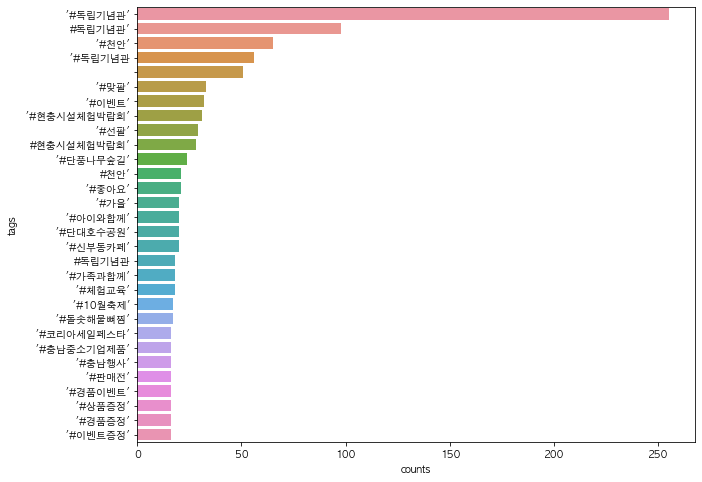

In [29]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

### 군인 크롤링 데이터 전처리

In [30]:
SNS_army = pd.read_excel("Desktop/army_vacation.xlsx")

In [31]:
army_tags = []

for tag in SNS_army['해시태그']:
    tag_list = tag[2:-2].split(",")
    for tag in tag_list:
        army_tags.append(tag)

In [32]:
army_tags_counts = Counter(army_tags)

In [36]:
army_tags_counts.most_common()

[(" '#군인'", 379),
 ('', 224),
 (" '#군인스타그램'", 115),
 (" '#이벤트'", 106),
 (" '#과학기술정보통신부'", 95),
 (" '#정보통신기획평가원'", 95),
 (" '#한국공개소프트웨어협회'", 95),
 (" '#이노베이션아카데미'", 95),
 (" '#개발자'", 95),
 (" '#개발자그램'", 95),
 (" '#인공지능'", 95),
 (" '#AI'", 95),
 (" '#공모전'", 95),
 (" '#공모전추천'", 95),
 (" '#경진대회'", 95),
 (" '#대외활동'", 95),
 (" '#event'", 95),
 (" '#씽굿공모전'", 95),
 (" '#대학생공모전'", 95),
 (" '#씽굿'", 94),
 (" '#이벤트그램'", 93),
 (" '#이벤트참여'", 93),
 (" '#일반인공모전", 91),
 (" '#국방부'", 76),
 (" '#맞팔'", 63),
 (" '#이벤트2022'", 56),
 (" '#선팔'", 55),
 (" '#좋아요'", 52),
 (" '#좋아요반사'", 43),
 (" '#일상'", 42),
 ("#리그램'", 41),
 (" '#군인", 37),
 (" '#육군'", 37),
 (" '#소통'", 34),
 (" '#데일리'", 32),
 (" '#좋반'", 31),
 ("#군인'", 29),
 (" '#선팔하면맞팔'", 28),
 (" '#daily'", 28),
 (" '#팔로우'", 24),
 ("#국방부'", 24),
 (" '#해군'", 23),
 (" '#군대'", 23),
 (" '#공군'", 22),
 (" '#군스타그램'", 22),
 (" '#부사관'", 21),
 (" '#장교'", 19),
 (" '#운동'", 18),
 (" '#헬스'", 17),
 (" '#셀카'", 17),
 (" '#여행'", 16),
 ("#이벤트2022'", 15),
 (" '#운동하는남자'", 15),
 (" '#일상

In [34]:
army_tag_counts_df = pd.DataFrame(army_tags_counts.most_common(30))
army_tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

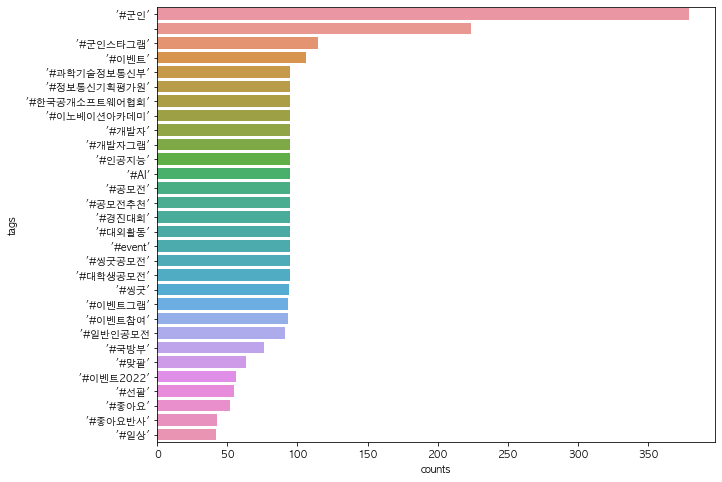

In [35]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags', data = army_tag_counts_df)

### 지역 투어 상품 데이터

In [48]:
tour_data_df = pd.DataFrame([])

folder = 'Desktop/지역별 투어:교통상품 데이터/'
f_list = ['YN_REGNAL_TOUR_ND_TRNSPORT_GOODS_202209.csv',
         'YN_REGNAL_TOUR_ND_TRNSPORT_GOODS_202208.csv',
         'YN_REGNAL_TOUR_ND_TRNSPORT_GOODS_202207.csv',
         'YN_REGNAL_TOUR_ND_TRNSPORT_GOODS_202206.csv',
         'YN_REGNAL_TOUR_ND_TRNSPORT_GOODS_202205.csv',
         'YN_REGNAL_TOUR_ND_TRNSPORT_GOODS_202203.csv',
         'YN_REGNAL_TOUR_ND_TRNSPORT_GOODS_202202.csv',
         'YN_REGNAL_TOUR_ND_TRNSPORT_GOODS_202201.csv']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_csv(fpath)
    tour_data_df = tour_data_df.append(temp)
    
tour_data_df.columns = ['지역', '투어상품코드', '상품명', '상품주소', '날짜']

In [74]:
tour_data_df = tour_data_df.dropna()

In [75]:
tour_cheonan_df = tour_data_df[tour_data_df['지역'].str.contains('천안')]

In [123]:
tour_cheonan_df.to_excel("Desktop/야놀자 천안 인기 여행지.xlsx", index = False)

### 여행지 키워드 데이터

In [51]:
tour_keyword_data_df = pd.DataFrame([])

f_list = ['CI_YEAR_ACCTO_TRRSRT_KWRD_LIST_2021.csv', 'CI_ALL_PD_TRRSRT_KWRD_INFO_2020.csv']

folder = 'Desktop/여행지 키워드 데이터/'

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_csv(fpath)
    tour_keyword_data_df = tour_keyword_data_df.append(temp)

In [78]:
tour_keyword_data_df

,ID,AREA_NM,KWRD_RANK_CO,KWRD_NM,PASSNGR_KWRD_RANK_CO,PASSNGR_KWRD_NM,LCLS_KWRD_RANK_CO,LCLS_KWRD_NM,OCCRRNC_YEAR
0,TTL_01,전국,1.0,바다,1.0,바다,1.0,먹거리,2021.0
1,TTL_02,전국,2.0,먹거리,2.0,해변,1.0,공원,2021.0
2,TTL_03,전국,3.0,해변,3.0,먹거리,3.0,바다,2021.0
3,TTL_04,전국,4.0,공원,4.0,힐링,4.0,축제,2021.0
4,TTL_05,전국,5.0,해산물,5.0,해산물,5.0,해산물,2021.0
...,...,...,...,...,...,...,...,...,...
506,JJ_26,제주특별자치도,26.0,산책,26.0,한라산,26.0,리조트,NaN
507,JJ_27,제주특별자치도,27.0,산방산,27.0,섭지코지,27.0,함덕해수욕장,NaN
508,JJ_28,제주특별자치도,28.0,경관,28.0,산방산,28.0,경관,NaN
509,JJ_29,제주특별자치도,29.0,아이,29.0,경관,29.0,산책,NaN


In [86]:
tour_keyword_all_df = tour_keyword_data_df[tour_keyword_data_df['AREA_NM'] == '전국']

In [88]:
tour_keyword_all_df = tour_keyword_all_df.fillna('2020')

In [110]:
tour_keyword_all_df = tour_keyword_all_df[['AREA_NM', 'KWRD_RANK_CO', 'KWRD_NM', 'OCCRRNC_YEAR']]
tour_keyword_all_df.columns = ['지역', '순위', '여행키워드', '년도']

KeyError: "None of [Index(['AREA_NM', 'KWRD_RANK_CO', 'KWRD_NM', 'OCCRRNC_YEAR'], dtype='object')] are in the [columns]"

In [113]:
tour_keyword_all_df.to_excel("Desktop/전국 여행지 키워드.xlsx", index = False)

In [101]:
tour_keyword_cheonan_df = tour_keyword_data_df[tour_keyword_data_df['AREA_NM'] == '충청남도']

In [103]:
tour_keyword_cheonan_df = tour_keyword_cheonan_df.fillna('2020.0')

In [109]:
tour_keyword_cheonan_df = tour_keyword_cheonan_df[['AREA_NM', 'KWRD_RANK_CO', 'KWRD_NM', 'OCCRRNC_YEAR']]
tour_keyword_cheonan_df.columns = ['지역', '순위', '여행키워드', '년도']
tour_keyword_cheonan_df

,지역,순위,여행키워드,년도
364,충청남도,1.0,바다,2021.0
365,충청남도,2.0,해산물,2021.0
366,충청남도,3.0,해변,2021.0
367,충청남도,4.0,먹거리,2021.0
368,충청남도,5.0,온천,2021.0
...,...,...,...,...
356,충청남도,26.0,현충사,2020.0
357,충청남도,27.0,칠갑산,2020.0
358,충청남도,28.0,호수공원,2020.0
359,충청남도,29.0,어죽,2020.0


In [114]:
tour_keyword_cheonan_df.to_excel("Desktop/충청남도 여행지 키워드.xlsx", index = False)

### 여가시간 활용 목적 데이터

In [53]:
time_data_df = pd.DataFrame([])

f_list = ['CI_LSR_TIME_USE_PURPS_INFO_20220720.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220627.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220629.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220704.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220718.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220725.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220727.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220803.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220810.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220817.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220824.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220831.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220907.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220914.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220921.csv',
         'CI_LSR_TIME_USE_PURPS_INFO_20220928 (1).csv']

folder = 'Desktop/여가시간 활용목적/'

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_csv(fpath)
    time_data_df = time_data_df.append(temp)

In [54]:
time_data_df.columns = ['응답자ID', '조사시작일자', '성별', '연령대', '거주지', '가구소득정도', '여가시간1순위', '여가시간2순위']

In [64]:
time_20M_df = time_data_df[(time_data_df['성별'] == 'M') & (time_data_df['연령대'] == '20대')]

In [68]:
time_20M_df['여가시간1순위'].value_counts()

자기만족-즐거움을 위해           219
스트레스 해소를 위해            153
마음의 안정-휴식을 위해          133
가족-지인 등과 시간을 보내기 위해     73
대인 관계-교제를 위해            68
자기 계발을 위해               50
건강 관리를 위해               42
남는 시간을 보내기 위해           39
Name: 여가시간1순위, dtype: int64

In [69]:
time_20M_df['여가시간2순위'].value_counts()

스트레스 해소를 위해            142
마음의 안정-휴식을 위해          142
자기만족-즐거움을 위해           137
가족-지인 등과 시간을 보내기 위해     83
대인 관계-교제를 위해            63
건강 관리를 위해               60
자기 계발을 위해               56
남는 시간을 보내기 위해           51
없음                      43
Name: 여가시간2순위, dtype: int64

In [121]:
time_20M_df.to_excel("Desktop/20대 남성 여가시간.xlsx", index =False)

In [122]:
pd.read_excel("Desktop/20대 남성 여가시간.xlsx")

,응답자ID,조사시작일자,성별,연령대,거주지,가구소득정도,여가시간1순위,여가시간2순위
0,53322813,20220720,M,20대,서울특별시,700만원 이상,대인 관계-교제를 위해,스트레스 해소를 위해
1,53323778,20220720,M,20대,경기도,700만원 이상,자기만족-즐거움을 위해,가족-지인 등과 시간을 보내기 위해
2,53325033,20220720,M,20대,서울특별시,300이상500만원 미만,스트레스 해소를 위해,건강 관리를 위해
3,53325068,20220720,M,20대,경기도,300이상500만원 미만,자기만족-즐거움을 위해,남는 시간을 보내기 위해
4,53326463,20220720,M,20대,부산광역시,300이상500만원 미만,대인 관계-교제를 위해,가족-지인 등과 시간을 보내기 위해
...,...,...,...,...,...,...,...,...
772,53362610,20220928,M,20대,부산광역시,300이상500만원 미만,자기만족-즐거움을 위해,대인 관계-교제를 위해
773,53362853,20220928,M,20대,경기도,300만원 미만,자기만족-즐거움을 위해,스트레스 해소를 위해
774,53366856,20220928,M,20대,경기도,무응답,스트레스 해소를 위해,마음의 안정-휴식을 위해
775,53371379,20220928,M,20대,서울특별시,700만원 이상,자기만족-즐거움을 위해,마음의 안정-휴식을 위해
